# "Conceptos fundamentales de deep learning"
> "por Juan del Rio"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [curso_Fast.ai]
- image: images/some_folder/your_image.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Lección 03: Conceptos fundamentales de deep learning

<a href="https://course.fast.ai/">Practical Deep Learning for Coders</a>


> Tip 1: ser tenaz, seguir intentándo resolver los problemas. 

> Tip 2: Antes de empezar con modelos más complejos se recomienda:
   - Usar un modelo muy sencillo y fácil de implementar: será mejor que un resultado aleatorio y servirá de base
   - Usar un modelo creado por otra persona con tus datos

###  Paso 1: Veamos un modelo sencillo para un clasificador de imagenes: **distancia a la media**

 - Se calcula la media de cada uno de los grupos de imagenes a clasificar

In [ ]:
# creo dos tensores que agrupen todas las imagenes de cada uno
tensores3=[tensor(Image.open(i)) for i in treses]
tensores7=[tensor(Image.open(i)) for i in sietes]
len(tensores3),len(tensores7)

(6131, 6265)

<AxesSubplot:>

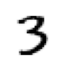

In [ ]:
# mostrar una imagen a partir de un tensor
show_image(tensores3[1])

In [ ]:
# crear tensores con las imagenes apiladas
pila3s = torch.stack(tensores3).float()/255
pila7s = torch.stack(tensores7).float()/255

In [ ]:
# medir dimensiones del tensor 
pila3s.shape

torch.Size([6131, 28, 28])

In [ ]:
# dos métodos de medir rango del tensor 
len(pila3s.shape), pila3s.ndim


(3, 3)

In [ ]:
# calcular la media de cada uno de la primera dimensión (0)
media3= pila3s.mean(0)
media7= pila7s.mean(0)

<AxesSubplot:>

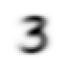

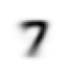

In [ ]:
show_image(media3)
show_image(media7)

<hr/>

- Buscamos la **distancia** que hay entre cada imagen y la media.

    Opciones:

     * Diferencias de valores absolutos (L1 norm)
     * Raiz del error medio cuadrático (RMSE o L2 norm): se penaliza más cuanto mayor sea el error


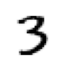

In [ ]:
a_3 = pila3s[1]
show_image(a_3);

In [ ]:
# cálculo de las distancias
dist_abs_3= (a_3-media3).abs().mean()
dist_sqr_3= ((a_3-media3)**2).mean().sqrt()
dist_abs_3,dist_sqr_3

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_abs_7= (a_3-media7).abs().mean()
dist_sqr_7= ((a_3-media7)**2).mean().sqrt()
dist_abs_7,dist_sqr_7

(tensor(0.1586), tensor(0.3021))

Se puede ver que la distancia al 3 "ideal" es menor al 7 "ideal", por lo tanto, el modelo predice correctamente.


In [ ]:
# usando la libreria de Pytorch
F.l1_loss(a_3.float(),media3),F.mse_loss(a_3.float(),media3).sqrt()


(tensor(0.1114), tensor(0.2021))

> Tip 1: Evitar el uso de loops, son mucho más lentos que los métodos que tienen vectores y tensores.

> Tip 2: Usar la funcionalidad Broadcasting para mayor eficiencia.Consiste en expandir un tensor de rango inferior al rango de otro con el que se quiere operar.
<br>Se optimiza el uso de la memoria y se ejecuta de manera rápida a través de C o GPUs

###  Paso 2: aprendizaje automático con red neuronal (artificial)

Buscaremos un sistema que vaya mejorando las predicciones de forma automática. 

Para ello, usaremos una red neuronal que está formada por una serie de capas de neuronas interconectadas. 

Están compuestas por números:
- parámetros: valores que definen el modelo, se inicializan de forma aleatoria y se irán optimizando
- activaciones: valores calculados

Las capas pueden ser lineales o no lineales (por ejemplo, función de activación ReLU). Combinando estas capas se puede resolver cualquier problema.

Cada neurona tendrá una función de activación que recibe los inputs de la capa anterior:

f(x) = w * x + b , donde w son los pesos y b es el sesgo (w y b -> parámetros)

Esta función nos dará las predicciones en base a los pesos que tenemos.


<hr>
Para lograr el aprendizaje automático usamos la técnica del Descenso del Gradiente **Stochastic Gradient Descent (SGD)** :

    1- inicializar los pesos (w) de forma aleatoria o de un modelo pre-entrenado
    2- calcular la predicciones para cada entrada (usando la función de activación) -> 'forward pass'
    3- calcular la bondad del modelo con una función de pérdida / distancia (L1 norm, RMSE,..)
    
        pérdida -> cuanto menor sea mejor
        función de pérdida:
            - no usar la 'precisión' 
            - usar 'sigmoid': acepta cualquier valor real, valores entre 0 y 1 y derivada con sentido
            - usar ReLU para capas no lineares, función que asigna un 0 a las entradas negativas.
        
    4- calcular el gradiente de w para saber cómo afecta la variación en cada uno en la función de pérdida. Cómo tenemos que variar los w para minimizar la pérdida (optimizar el modelo)  -> 'backward pass'
        
        y = f(x)  
        y.backward()  // calcular el gradiente
        x.grad        // consulta del gradiente
    
    5- dar un paso: modificar los w en base al gradiente: w := w + grad(w)* lr (ratio de aprendizaje/learning rate)
    
        lr suele estar entre 0.001 y 0.1 
        
        Si es pequeño tardará demasiado en llegar al óptimo
        Si es grande puede no llegar nunca, se saltaría el óptimo
        
    6- volver y repetir el proceso
    7- parar cuando se estime que el modelo es suficientemente bueno o no se puede esperar más (num. epochs)

### Mini lotes (batches)

En lugar de realizar el proceso sobre todas entradas (llevaría mucho tiempo) o sobre una (muy impreciso), se calculará sobre un número reducido.
El tamaño del lote llevará a un modelo más preciso o a uno más rápido.

La GPUs usarán estos lotes para acelerar el proceso